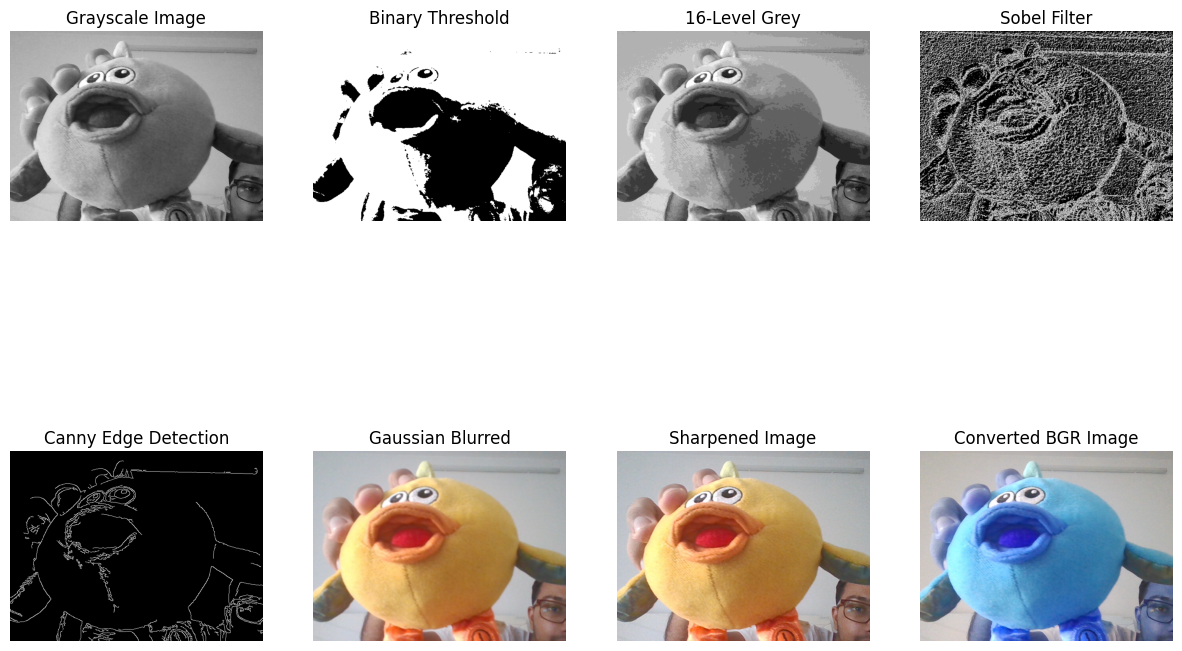

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(name, n, m, i, Title):
    plt.subplot(n, m, i)
    plt.imshow(name,cmap='gray')  
    plt.title(Title)
    plt.axis("off")

def capture_image():
    cap = cv2.VideoCapture(0)  
    ret, frame = cap.read()
    cap.release()
    if ret:
        return cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  
    else:
        raise ValueError("Could not capture image. Check your camera.")

def grayscale(image):
    gray = np.mean(image, axis=2)
    return gray.astype(np.uint8)

def reduce_grey_levels(image, levels=2):
    step = 256 // levels
    reduced = (image // step) * step
    return reduced.astype(np.uint8)

def sobel_filter(image):
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    sobel_x = cv2.filter2D(image, -1, kernel_x)
    sobel_y = cv2.filter2D(image, -1, kernel_y)
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)
    return np.clip(sobel, 0, 255).astype(np.uint8)


def canny_edge(image, lower=50, upper=150):
    return cv2.Canny(image, lower, upper)

def gaussian_blur(image, kernel_size=5):
    kernel = cv2.getGaussianKernel(kernel_size, sigma=1)
    gaussian_kernel = kernel @ kernel.T
    return cv2.filter2D(image, -1, gaussian_kernel)

def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

def rgb_to_bgr(image):
    bgr_image = image.copy()  
    bgr_image[:, :, 0], bgr_image[:, :, 2] = image[:, :, 2], image[:, :, 0]
    return bgr_image

def main():
    original = capture_image()
    gray = grayscale(original)
    binary = reduce_grey_levels(gray)
    reduced_gray = reduce_grey_levels(gray,16)
    sobel = sobel_filter(gray)
    canny = canny_edge(gray)
    blurred = gaussian_blur(original)
    sharpened = sharpen_image(blurred)
    bgr_image = rgb_to_bgr(original)

    plt.figure(figsize=(15, 10))
    show(gray, 2, 4, 1, "Grayscale Image")
    show(binary, 2, 4, 2, "Binary Threshold")
    show(reduced_gray, 2, 4, 3, "16-Level Grey")
    show(sobel, 2, 4, 4, "Sobel Filter")
    show(canny, 2, 4, 5, "Canny Edge Detection")
    show(blurred, 2, 4, 6, "Gaussian Blurred")
    show(sharpened, 2, 4, 7, "Sharpened Image")
    show(bgr_image, 2, 4, 8, "Converted BGR Image")
    plt.show()

if __name__=='__main__':
    main()


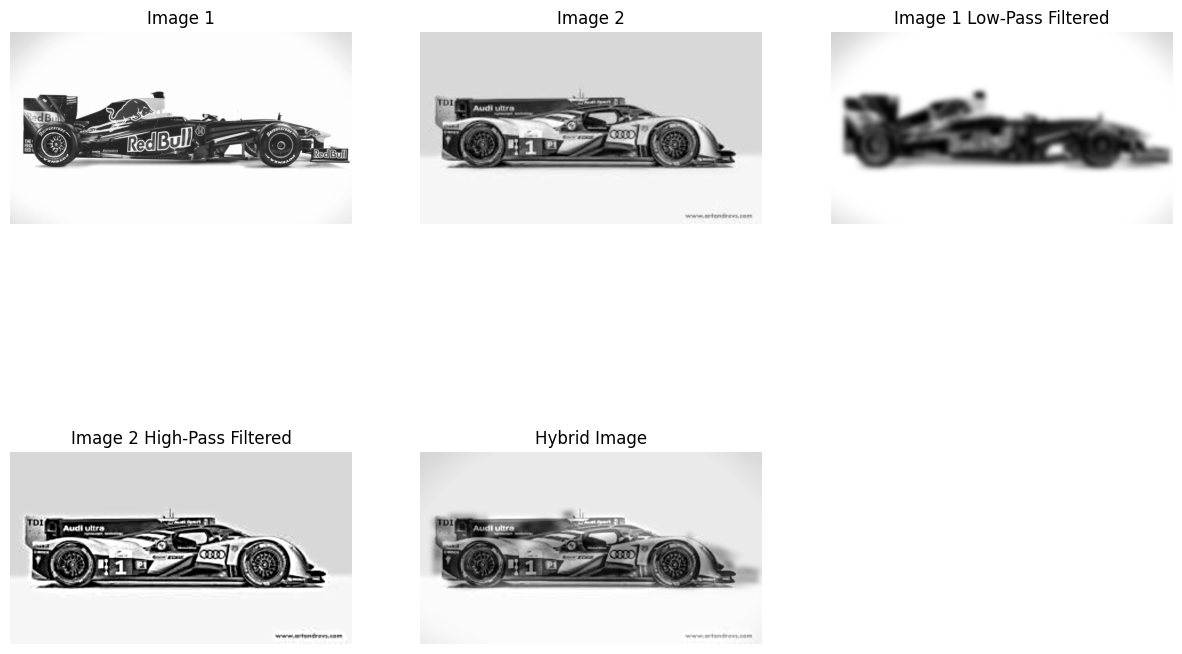

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def low_pass_filter(image, cutoff_frequency):
    return cv2.GaussianBlur(image, (cutoff_frequency, cutoff_frequency), 0)

def high_pass_filter(image, cutoff_frequency):
    low_pass = low_pass_filter(image, cutoff_frequency)
    return cv2.addWeighted(image, 2, low_pass, -1, 0)

def show(name, n, m, i, Title):
    plt.subplot(n, m, i)
    plt.imshow(name,cmap='grey')
    plt.title(Title)
    plt.axis("off")

image1 = cv2.imread('image1.png')
image2 = cv2.resize(cv2.imread('image2.png'),(image1.shape[1],image1.shape[0]))
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

image1_low_pass = low_pass_filter(image1_rgb, 35)
image2_high_pass = high_pass_filter(image2_rgb, 35)

hybrid_image = cv2.addWeighted(image1_low_pass, 0.5, image2_high_pass, 0.5, 0)

plt.figure(figsize=(15, 10))
show(image1_rgb, 2, 3, 1, "Image 1")
show(image2_rgb, 2, 3, 2, "Image 2")
show(image1_low_pass, 2, 3, 3, "Image 1 Low-Pass Filtered")
show(image2_high_pass, 2, 3, 4, "Image 2 High-Pass Filtered")
show(hybrid_image, 2, 3, 5, "Hybrid Image")
plt.show()